In [1]:
import keras
from keras import Sequential, Model
from keras.applications import Xception
from keras.layers import Flatten, Dense, Softmax
from keras.preprocessing import image
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
model = Sequential()
model.add(Xception(include_top=False, weights=None, input_shape=(299, 299, 3), pooling='avg'))
model.add(Flatten())
model.add(Dense(43))
model.add(Softmax())
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 43)                88107     
_________________________________________________________________
softmax (Softmax)            (None, 43)                0         
Total params: 20,949,587
Trainable params: 20,895,059
Non-trainable params: 54,528
_________________________________________________________________


20 Train/20/00020_00000_00020.png
Found 39209 validated image filenames belonging to 43 classes.
Found 12630 validated image filenames belonging to 43 classes.


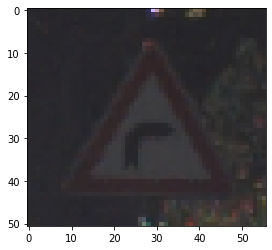

In [3]:
trainDataFrame = pd.read_csv('F:/GTSRB_R/GTSRB_DATA_SET/Train.csv')
testDataFrame = pd.read_csv('F:/GTSRB_R/GTSRB_DATA_SET/Test.csv')

trainDataFrame['ClassId'] = trainDataFrame['ClassId'].astype(str)
testDataFrame['ClassId'] = testDataFrame['ClassId'].astype(str)

for i in range(0, len(trainDataFrame['ClassId'])):
    if len(trainDataFrame['ClassId'][i]) == 1:
        trainDataFrame['ClassId'][i] = '0' + trainDataFrame['ClassId'][i]
for i in range(0, len(testDataFrame['ClassId'])):
    if len(testDataFrame['ClassId'][i]) == 1:
        testDataFrame['ClassId'][i] = '0' + testDataFrame['ClassId'][i]

print(trainDataFrame['ClassId'][20], trainDataFrame['Path'][20])
img = Image.open('F:/GTSRB_R/GTSRB_DATA_SET/' + trainDataFrame['Path'][20])
plt.imshow(img)

trainDataGen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2
)
testDataGen = image.ImageDataGenerator(
    rescale=1./255
)

trainDataGenerator = trainDataGen.flow_from_dataframe(
    dataframe=trainDataFrame,
    directory='F:/GTSRB_R/GTSRB_DATA_SET/',
    x_col='Path',
    y_col='ClassId',
    target_size=(299, 299),
    batch_size=128,
    class_mode='categorical'
)
testDataGenerator = testDataGen.flow_from_dataframe(
    dataframe=testDataFrame,
    directory='F:/GTSRB_R/GTSRB_DATA_SET/',
    x_col='Path',
    y_col='ClassId',
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical'
)

In [ ]:
history = model.fit(trainDataGenerator, epochs=5, verbose=1)

In [6]:
Xception(include_top=False, weights=None, input_shape=(299, 299, 3), pooling='avg').summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [7]:
Xception(include_top=True, weights=None, input_shape=(299, 299, 3), pooling='avg').summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________